<a href="https://colab.research.google.com/github/sensiboi/Credit-Risk-Analysis-and-Loan-Default-Prediction-using-Machine-Learning/blob/main/Predictive_Analytics_for_Loan_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk Analysis and Loan Default Prediction using Machine Learning**

Import Libraries

In [1]:
import pandas as pd
import numpy as np

Import Dataset

In [2]:
df= pd.read_csv('Loan_default.csv')

Removing duplicate value

In [3]:
df=df.drop_duplicates()

Handle Missing Values

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1842323058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1842323058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [6]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Feature Engineering and Encoding

In [7]:
target = 'Default' #Target variable
df[target] = df[target].map({'Y':1, 'N':0}) #Binary encoding if needed

In [8]:
df['EMI_Income_Ratio'] = df['LoanAmount'] / (df['Income'] + 1) #Feature engineering

Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Model building

In [17]:
import pandas as pd
import numpy as np # Needed for median in fillna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# --- Re-load and re-process df to ensure 'Default' column is clean ---
# This is necessary because previous steps (specifically 4bqZ0KpnFG_G) might have
# corrupted the 'Default' column by converting 0s/1s to NaNs.

# 1. Re-read the dataset (equivalent to FoADvzCPDk0U)
df_clean = pd.read_csv('Loan_default.csv')

# 2. Remove duplicate values (equivalent to _K1pkIUbDvY3)
df_clean = df_clean.drop_duplicates()

# 3. Handle Missing Values (equivalent to MQGua9fYEDLu)
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0]) # Fix FutureWarning
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median()) # Fix FutureWarning

# 4. Feature Engineering (equivalent to 0CXF4WfpFoi4)
df_clean['EMI_Income_Ratio'] = df_clean['LoanAmount'] / (df_clean['Income'] + 1)

# Now, target column 'Default' in df_clean should be 0s and 1s from original data, not NaNs.
target = 'Default'

# --- Prepare y: Directly use the clean 'Default' column ---
y = df_clean[target]

# --- Prepare X: Drop 'LoanID' and one-hot encode other categorical features ---
X = df_clean.drop([target, 'LoanID'], axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns

# Identify numerical columns for scaling
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply one-hot encoding, dropping the first category to avoid multicollinearity
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features (only apply to columns that are still numerical after get_dummies)
# We need to filter numerical_cols that are still present in X_processed after one-hot encoding
# as some might have been replaced by dummy variables (if a numerical column was also object initially, which is rare)
# Or, more robustly, identify numerical columns within X_processed itself.
scaled_features = X_processed[numerical_cols]
X_processed[numerical_cols] = scaler.fit_transform(scaled_features)

# Re-perform the train-test split with the processed X and y
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)

# Initialize and fit the Logistic Regression model
# Increasing max_iter as suggested by the warning, though scaling should help more.
model = LogisticRegression(max_iter=2000) # Increased max_iter
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

Prediction

In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

Credit Loan Approval Criteria

In [19]:
CREDIT_SCORE_THRESHOLD = 650
DEFAULT_PROB_THRESHOLD = 0.40

In [20]:
# determine the loan approval based on credit score and predicted default probability
def loan_approval_decision(credit_score, default_probability):
  if credit_score >= CREDIT_SCORE_THRESHOLD and default_probability <= DEFAULT_PROB_THRESHOLD:
    return "Approved"
  else:
    return "Rejected"

Since this dataset does not include credit score so we assume average credit score for testing

In [21]:
np.random.seed(42)
credit_scores = np.random.randint(550, 800, size=len(y_prob))

Generate approval output

In [22]:
approval_results = []
for cs, prob in zip(credit_scores, y_prob):
    decision = loan_approval_decision(cs, prob)
    approval_results.append(decision)

Final decision table

In [23]:
decision_table = pd.DataFrame({
    "Credit_Score": credit_scores,
    "Default_Probability": y_prob,
    "Predicted_Default": y_pred,
    "Loan_Decision": approval_results
})
decision_table.head()

,Credit_Score,Default_Probability,Predicted_Default,Loan_Decision
0,652,0.031541,0,Approved
1,729,0.042118,0,Approved
2,642,0.070459,0,Rejected
3,564,0.095571,0,Rejected
4,656,0.099387,0,Approved


Evaluation Metrics

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
metrics_table

,Metric,Value
0,Accuracy,0.887057
1,Precision,0.635189
2,Recall,0.071605
3,F1 Score,0.128701


Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm,
    index=['Actual No Default', 'Actual Default'],
    columns=['Predicted No Default', 'Predicted Default']
)
cm_df

,Predicted No Default,Predicted Default
Actual No Default,67314,367
Actual Default,8285,639


**Visualization**

1. Default Distribution

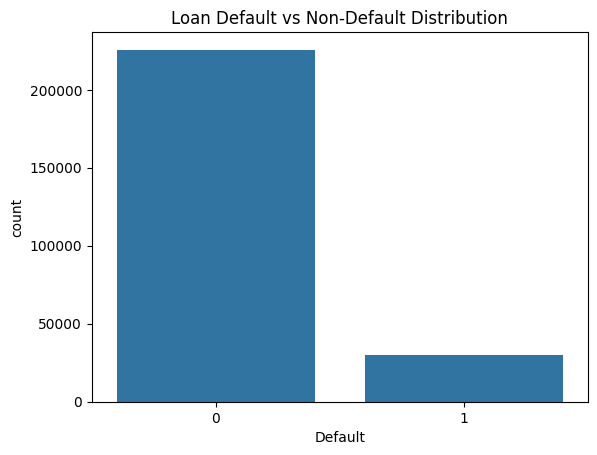

In [26]:
import seaborn as sns
plt.figure()
sns.countplot(x=y)
plt.title("Loan Default vs Non-Default Distribution")
plt.show()

Credit Score vs Default

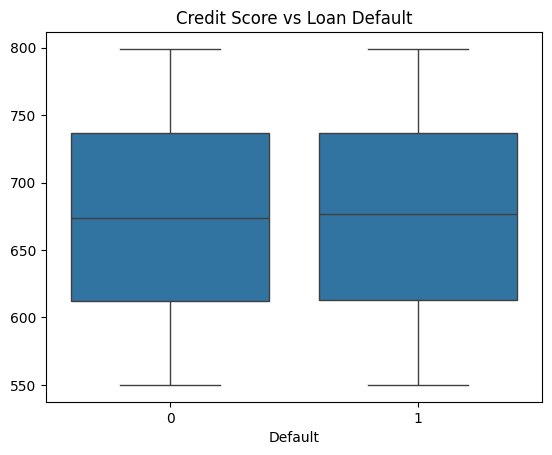

In [29]:
plt.figure()
sns.boxplot(x=y_test, y=credit_scores)
plt.title("Credit Score vs Loan Default")
plt.show()

Visualization of confusion matrix

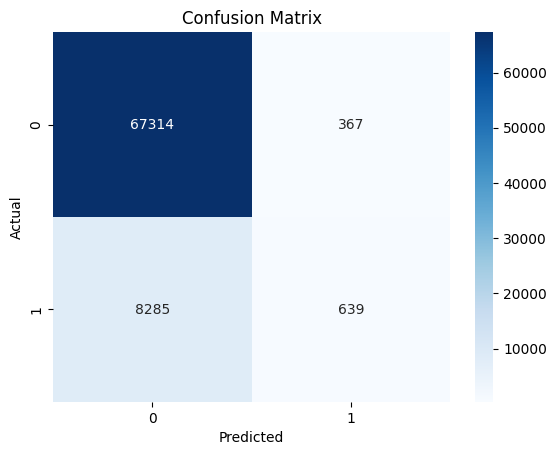

In [30]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Default probability distribution

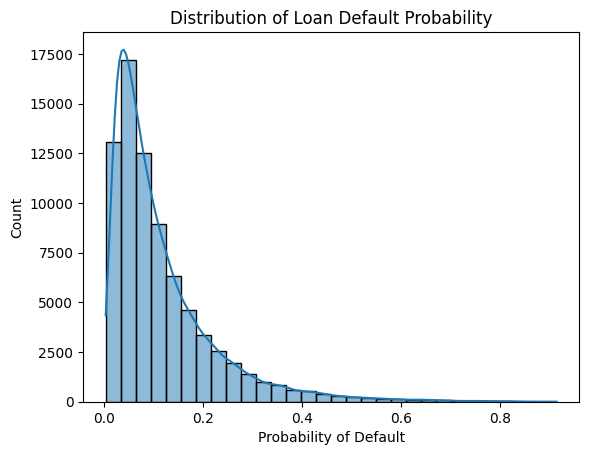

In [31]:
plt.figure()
sns.histplot(y_prob, bins=30, kde=True)
plt.title("Distribution of Loan Default Probability")
plt.xlabel("Probability of Default")
plt.show()